# Trajectories

<br>

***

In this notebook, we will explore the trajectories in event data and introduce some techniques for their effective visualization.

First, let's clarify what we mean by a trajectory:

> **Definition**: For an event function $t>0\mapsto (x(t),\ y(t),\ p(t))$, the $x$ trajectory is defined as the function $t\mapsto x(t)$, similarly, the $y$ trajectory is the function $t\mapsto y(t)$.

Given a collection of events $(x_i, y_i, p_i, t_i)_{1\leq i\leq n}\ $, we treat $t_i\mapsto x_i$ and $t_i\mapsto y_i,\ 1\leq i\leq n$ as noisy approximations of the actual $x$ and $y$ trajectories.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


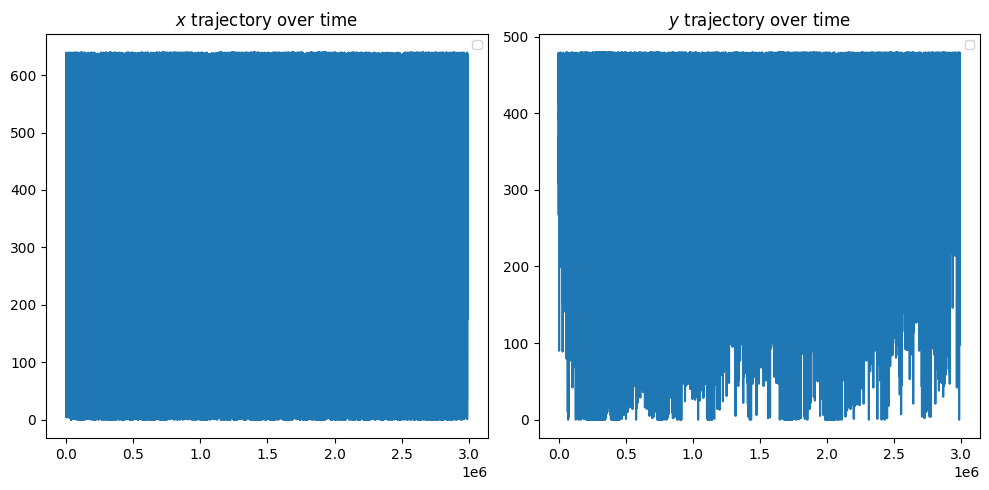

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

x = test_event_df['x']
y = test_event_df['y']
t = test_event_df['t']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create two subplots side by side

# Plot for x over time
axs[0].plot(t, x)
axs[0].set_title('$x$ trajectory over time')
axs[0].legend(fontsize='small')

# Plot for y over time
axs[1].plot(t, y)
axs[1].set_title('$y$ trajectory over time')
axs[1].legend(fontsize='small')

plt.tight_layout()
plt.show()

***

Event data often contains a lot of discrete points, which can make the trajectory look like a full square when plotted. One way to effectively visualize event trajectories is to use a scatter plot instead of a line plot. This allows you to see the individual events as points in the plot.

Here's an example:


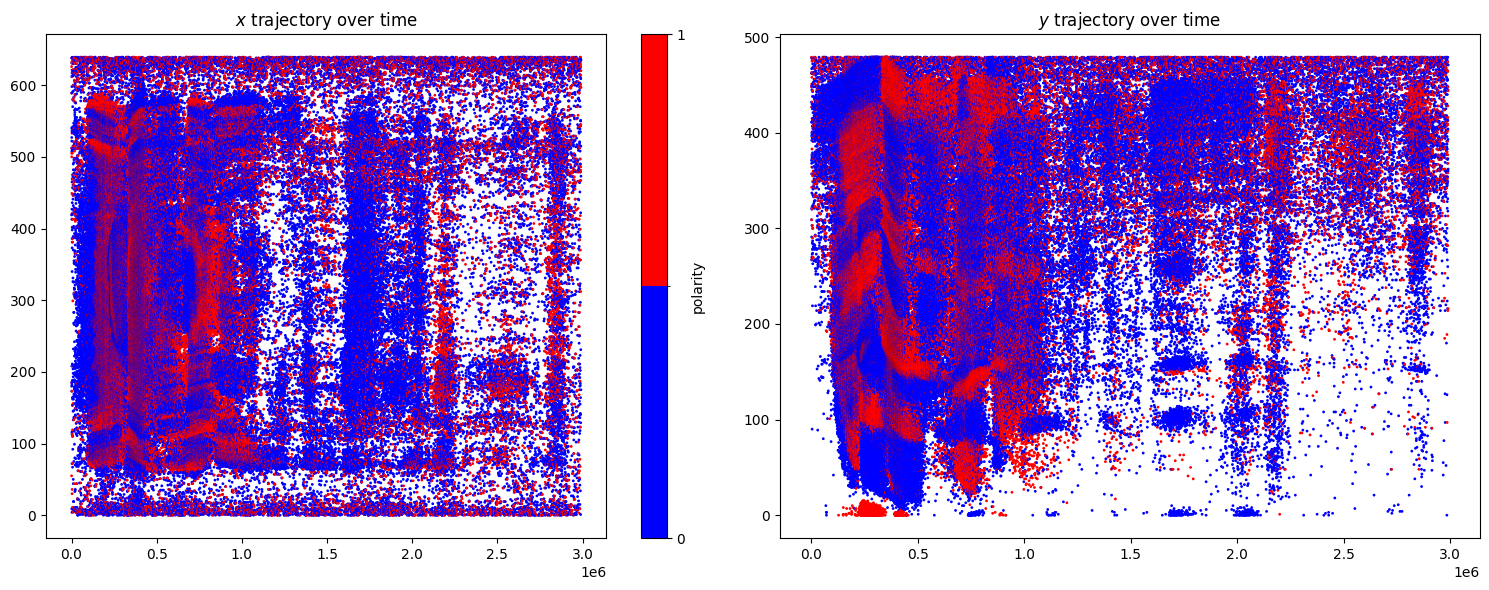

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

x = test_event_df['x']
y = test_event_df['y']
t = test_event_df['t']
p = test_event_df['p']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Create two subplots side by side

# Define the colormap
cmap = ListedColormap(['blue', 'red'])  # replace with the colors you want
norm = BoundaryNorm([0, 0.5, 1], cmap.N)  # define the bins

# Scatter plot for x over time
scatter = axs[0].scatter(t, x, c=p, s=1, cmap=cmap, norm=norm)  # s parameter adjusts the size of the points, c parameter sets the color
axs[0].set_title('$x$ trajectory over time') 

# Add colorbar
colorbar = plt.colorbar(scatter, ax=axs[0], ticks=[0, 1])
colorbar.set_label('polarity')

# Scatter plot for y over time
axs[1].scatter(t, y, c=p, s=1, cmap=cmap, norm=norm)  # s parameter adjusts the size of the points
axs[1].set_title('$y$ trajectory over time')

plt.tight_layout()
plt.show()


Another approach is to aggregate or bin the data in some way before plotting. For example, we calculate a moving average of the $x$ and $y$ trajectories over a fixed number of consecutive events.

This would smooth out the trajectory and make it easier to see any trends or patterns in the data.

Here's an example of how to calculate and plot a moving average of the $x$ and $y$ trajectories:


***

## Moving Average

<br>

The moving average is a transformation applied to the 'x' and 'y' series, but not to the 'p' (polarity) series. The polarity is a property of individual events, not of the moving average.
Therefore, it might not make sense to color the moving average points based on the polarity of the original events.

The moving average is typically used to smooth out short-term fluctuations and highlight longer-term trends or cycles. When computing the moving average, ther is a loss for some data points at the beginning of the series due to the window size.
For example, if your window size is 20, you won't have moving averages for the first 19 points in your series. and the transoformed serie will have the same number of elements of the 1st serie, minus 19.

If we want to keep the polarity information relevant to the moving average, we might consider a few options:

1. **Assign the most frequent polarity in the window**: For each window of events used to calculate the moving average, assign the mode polarity (the one that occurs most frequently).

2. **Assign the polarity of the central event**: If your window size is odd, you could assign the polarity of the central event in the window to the moving average.

3. **Calculate a moving average of the polarity**: This would give you a measure of the average polarity over the window, but it might be harder to interpret, especially if polarity is a boolean value.

Here's an example of how do the both three techniques

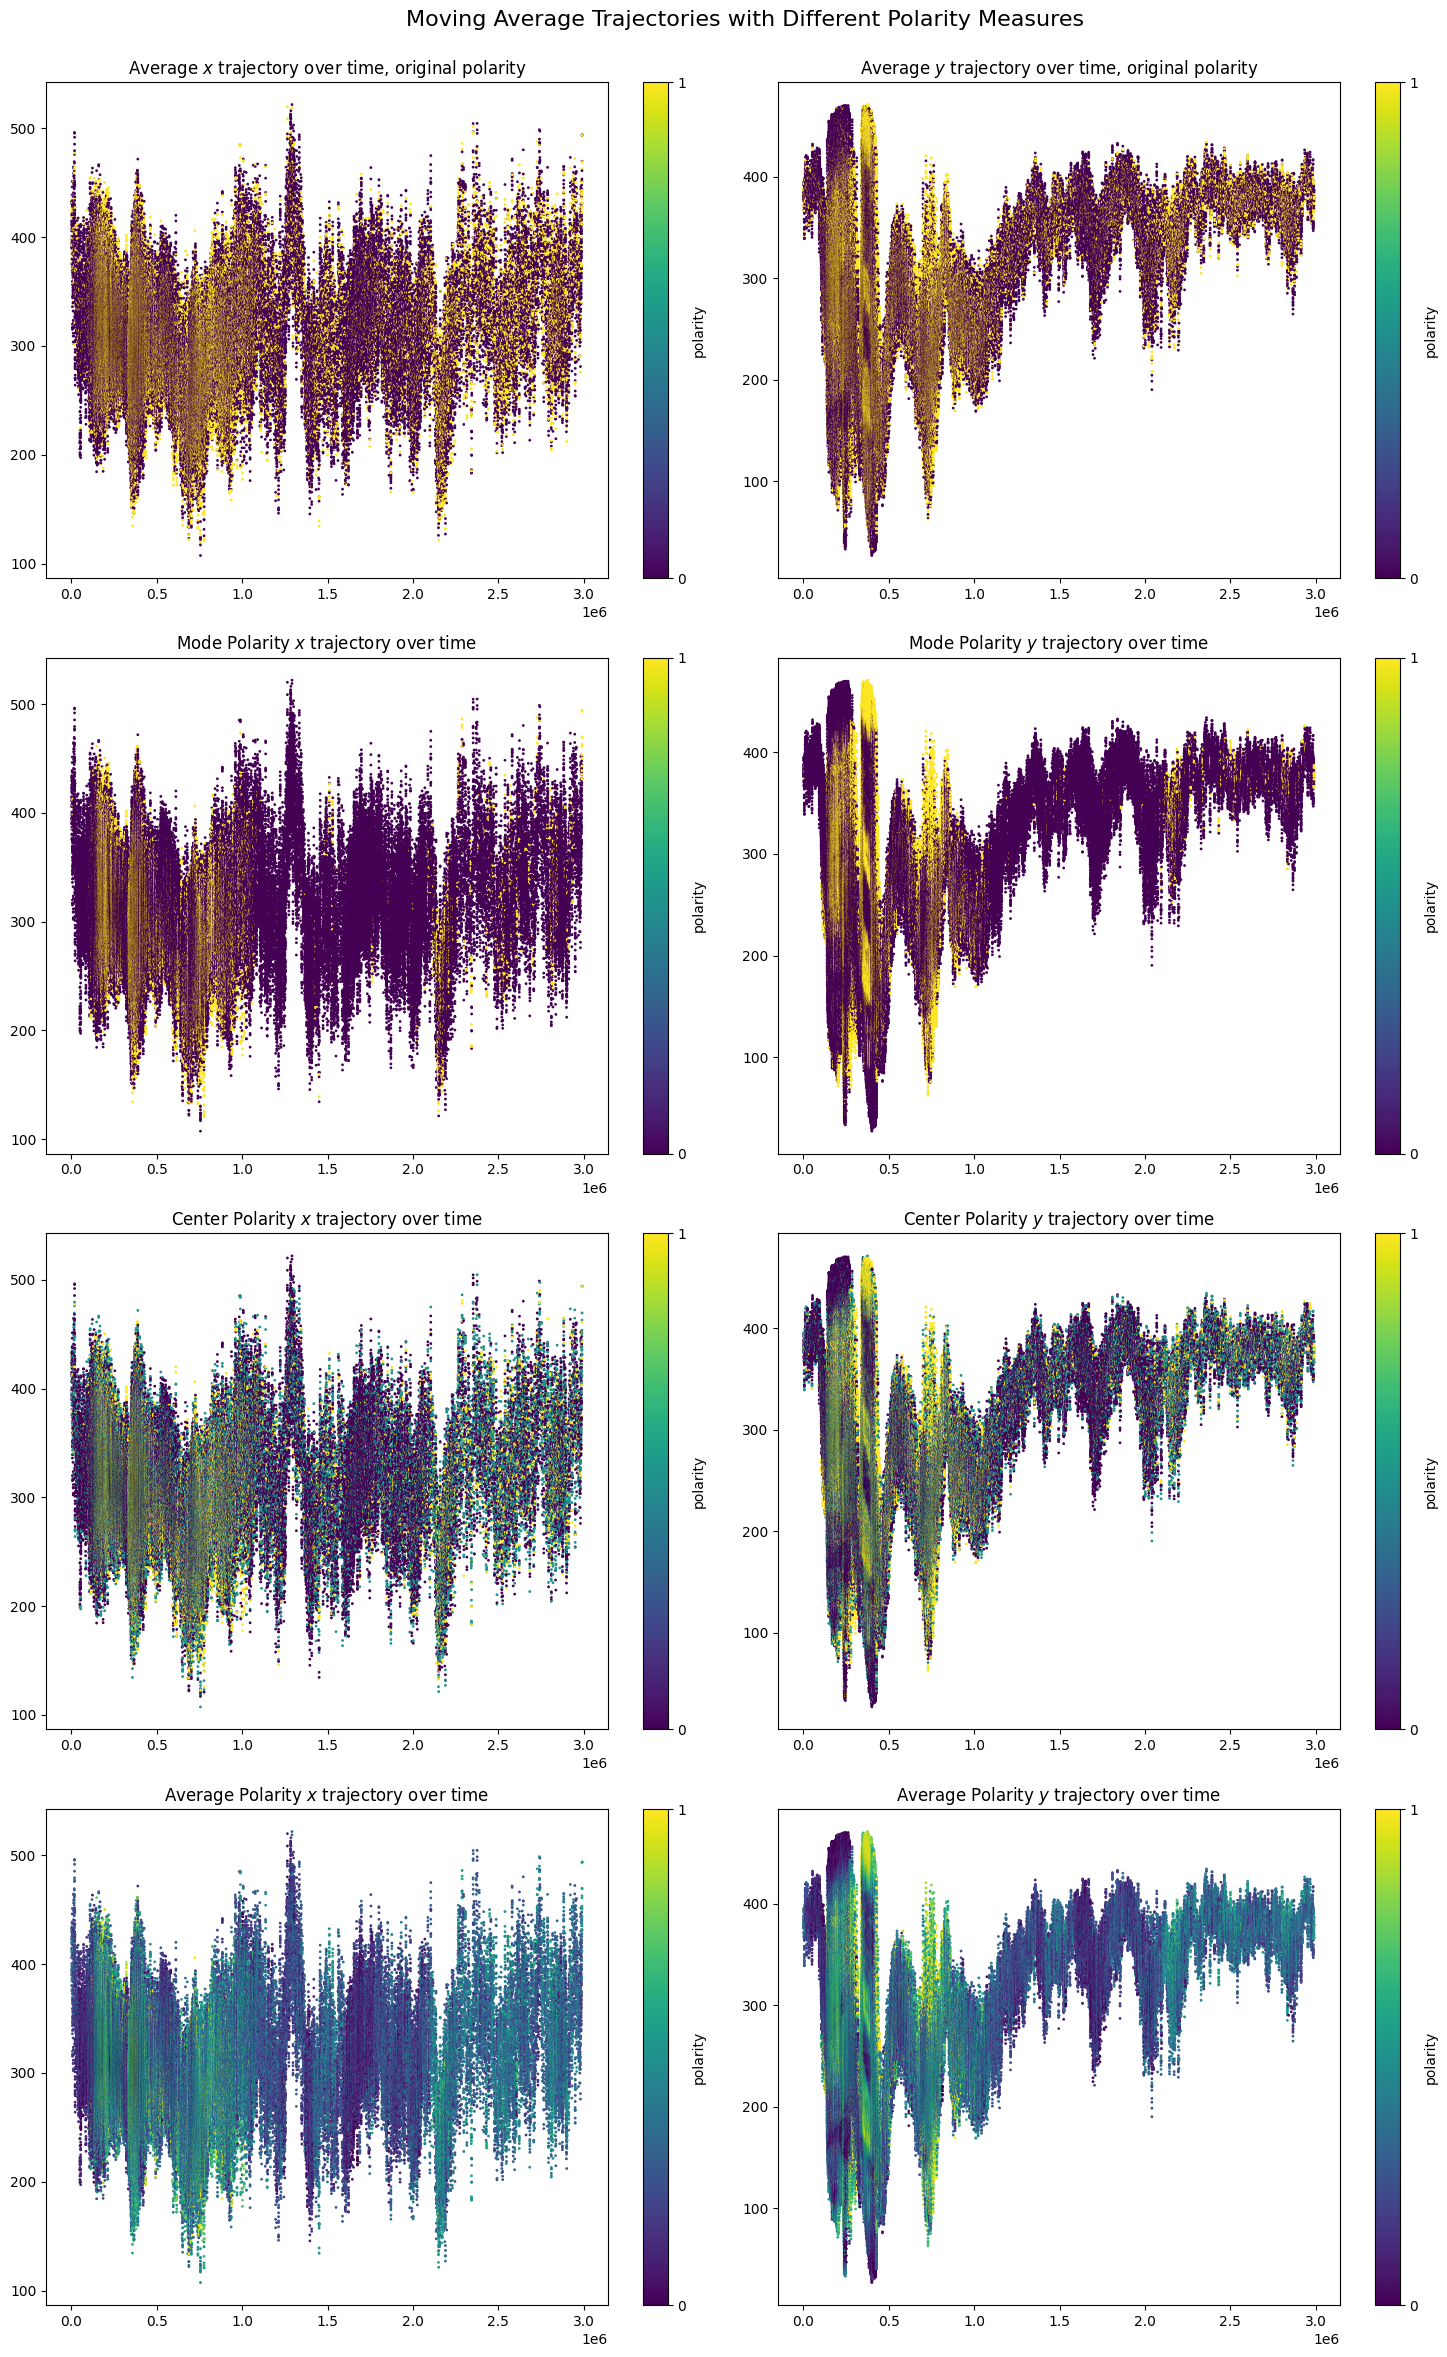

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, ListedColormap

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

# Calculate moving averages
window_size = 20  # adjust this to change the number of events to average over
test_event_df['x_avg'] = test_event_df['x'].rolling(window_size).mean() # moving average of x
test_event_df['y_avg'] = test_event_df['y'].rolling(window_size).mean() # moving average of y
test_event_df['p_mode'] = test_event_df['p'].rolling(window_size).apply(lambda x: x.mode()[0] if len(x.mode()) else np.nan) # polarity mode (most common value)
test_event_df['p_center'] = test_event_df['p'].rolling(window_size).apply(lambda x: np.mean(x[(len(x)-1)//2:len(x)//2+1])) # polarity of the center event in the window
test_event_df['p_avg'] = test_event_df['p'].rolling(window_size).mean() # average polarity

x_avg = test_event_df['x_avg'] # moving average of x
y_avg = test_event_df['y_avg'] # moving average of y
t = test_event_df['t'] # time
p = test_event_df['p'] # polarity
p_mode = test_event_df['p_mode'] # polarity mode (most common value)
p_center = test_event_df['p_center'] # polarity of the center event in the window
p_avg = test_event_df['p_avg'] # average polarity

fig, axs = plt.subplots(4, 2, figsize=(15, 24))  # Create 4x2 subplots

# Define the colormap
#cmap = ListedColormap(['blue', 'red'])  # replace with the colors you want
cmap = plt.cm.viridis
norm = Normalize(vmin=0, vmax=1)  # define the bins

# Original plot for x over time
scatter = axs[0, 0].scatter(t, x_avg, c=p, s=1, cmap=cmap, norm=norm)
axs[0, 0].set_title('Average $x$ trajectory over time, original polarity')
colorbar = plt.colorbar(scatter, ax=axs[0, 0], ticks=[0, 1])
colorbar.set_label('polarity')

# Original plot for y over time
scatter = axs[0, 1].scatter(t, y_avg, c=p, s=1, cmap=cmap, norm=norm)
axs[0, 1].set_title('Average $y$ trajectory over time, original polarity')
colorbar = plt.colorbar(scatter, ax=axs[0, 1], ticks=[0, 1])
colorbar.set_label('polarity')

# Repeat the above for p_mode, p_center, and p_avg
for i, p_new, title in zip(range(1, 4), [p_mode, p_center, p_avg], ['Mode', 'Center', 'Average']):
    norm = Normalize()  # redefine the bins for each subplot
    scatter = axs[i, 0].scatter(t, x_avg, c=p_new, s=1, cmap=cmap, norm=norm)
    axs[i, 0].set_title(f'{title} Polarity $x$ trajectory over time')
    colorbar = plt.colorbar(scatter, ax=axs[i, 0], ticks=[0, 1])
    colorbar.set_label('polarity')
    scatter = axs[i, 1].scatter(t, y_avg, c=p_new, s=1, cmap=cmap, norm=norm)
    axs[i, 1].set_title(f'{title} Polarity $y$ trajectory over time')
    colorbar = plt.colorbar(scatter, ax=axs[i, 1], ticks=[0, 1])
    colorbar.set_label('polarity')

# Set the main title for the figure
fig.suptitle('Moving Average Trajectories with Different Polarity Measures', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # make some room for the main title

# Show the plot
plt.show()

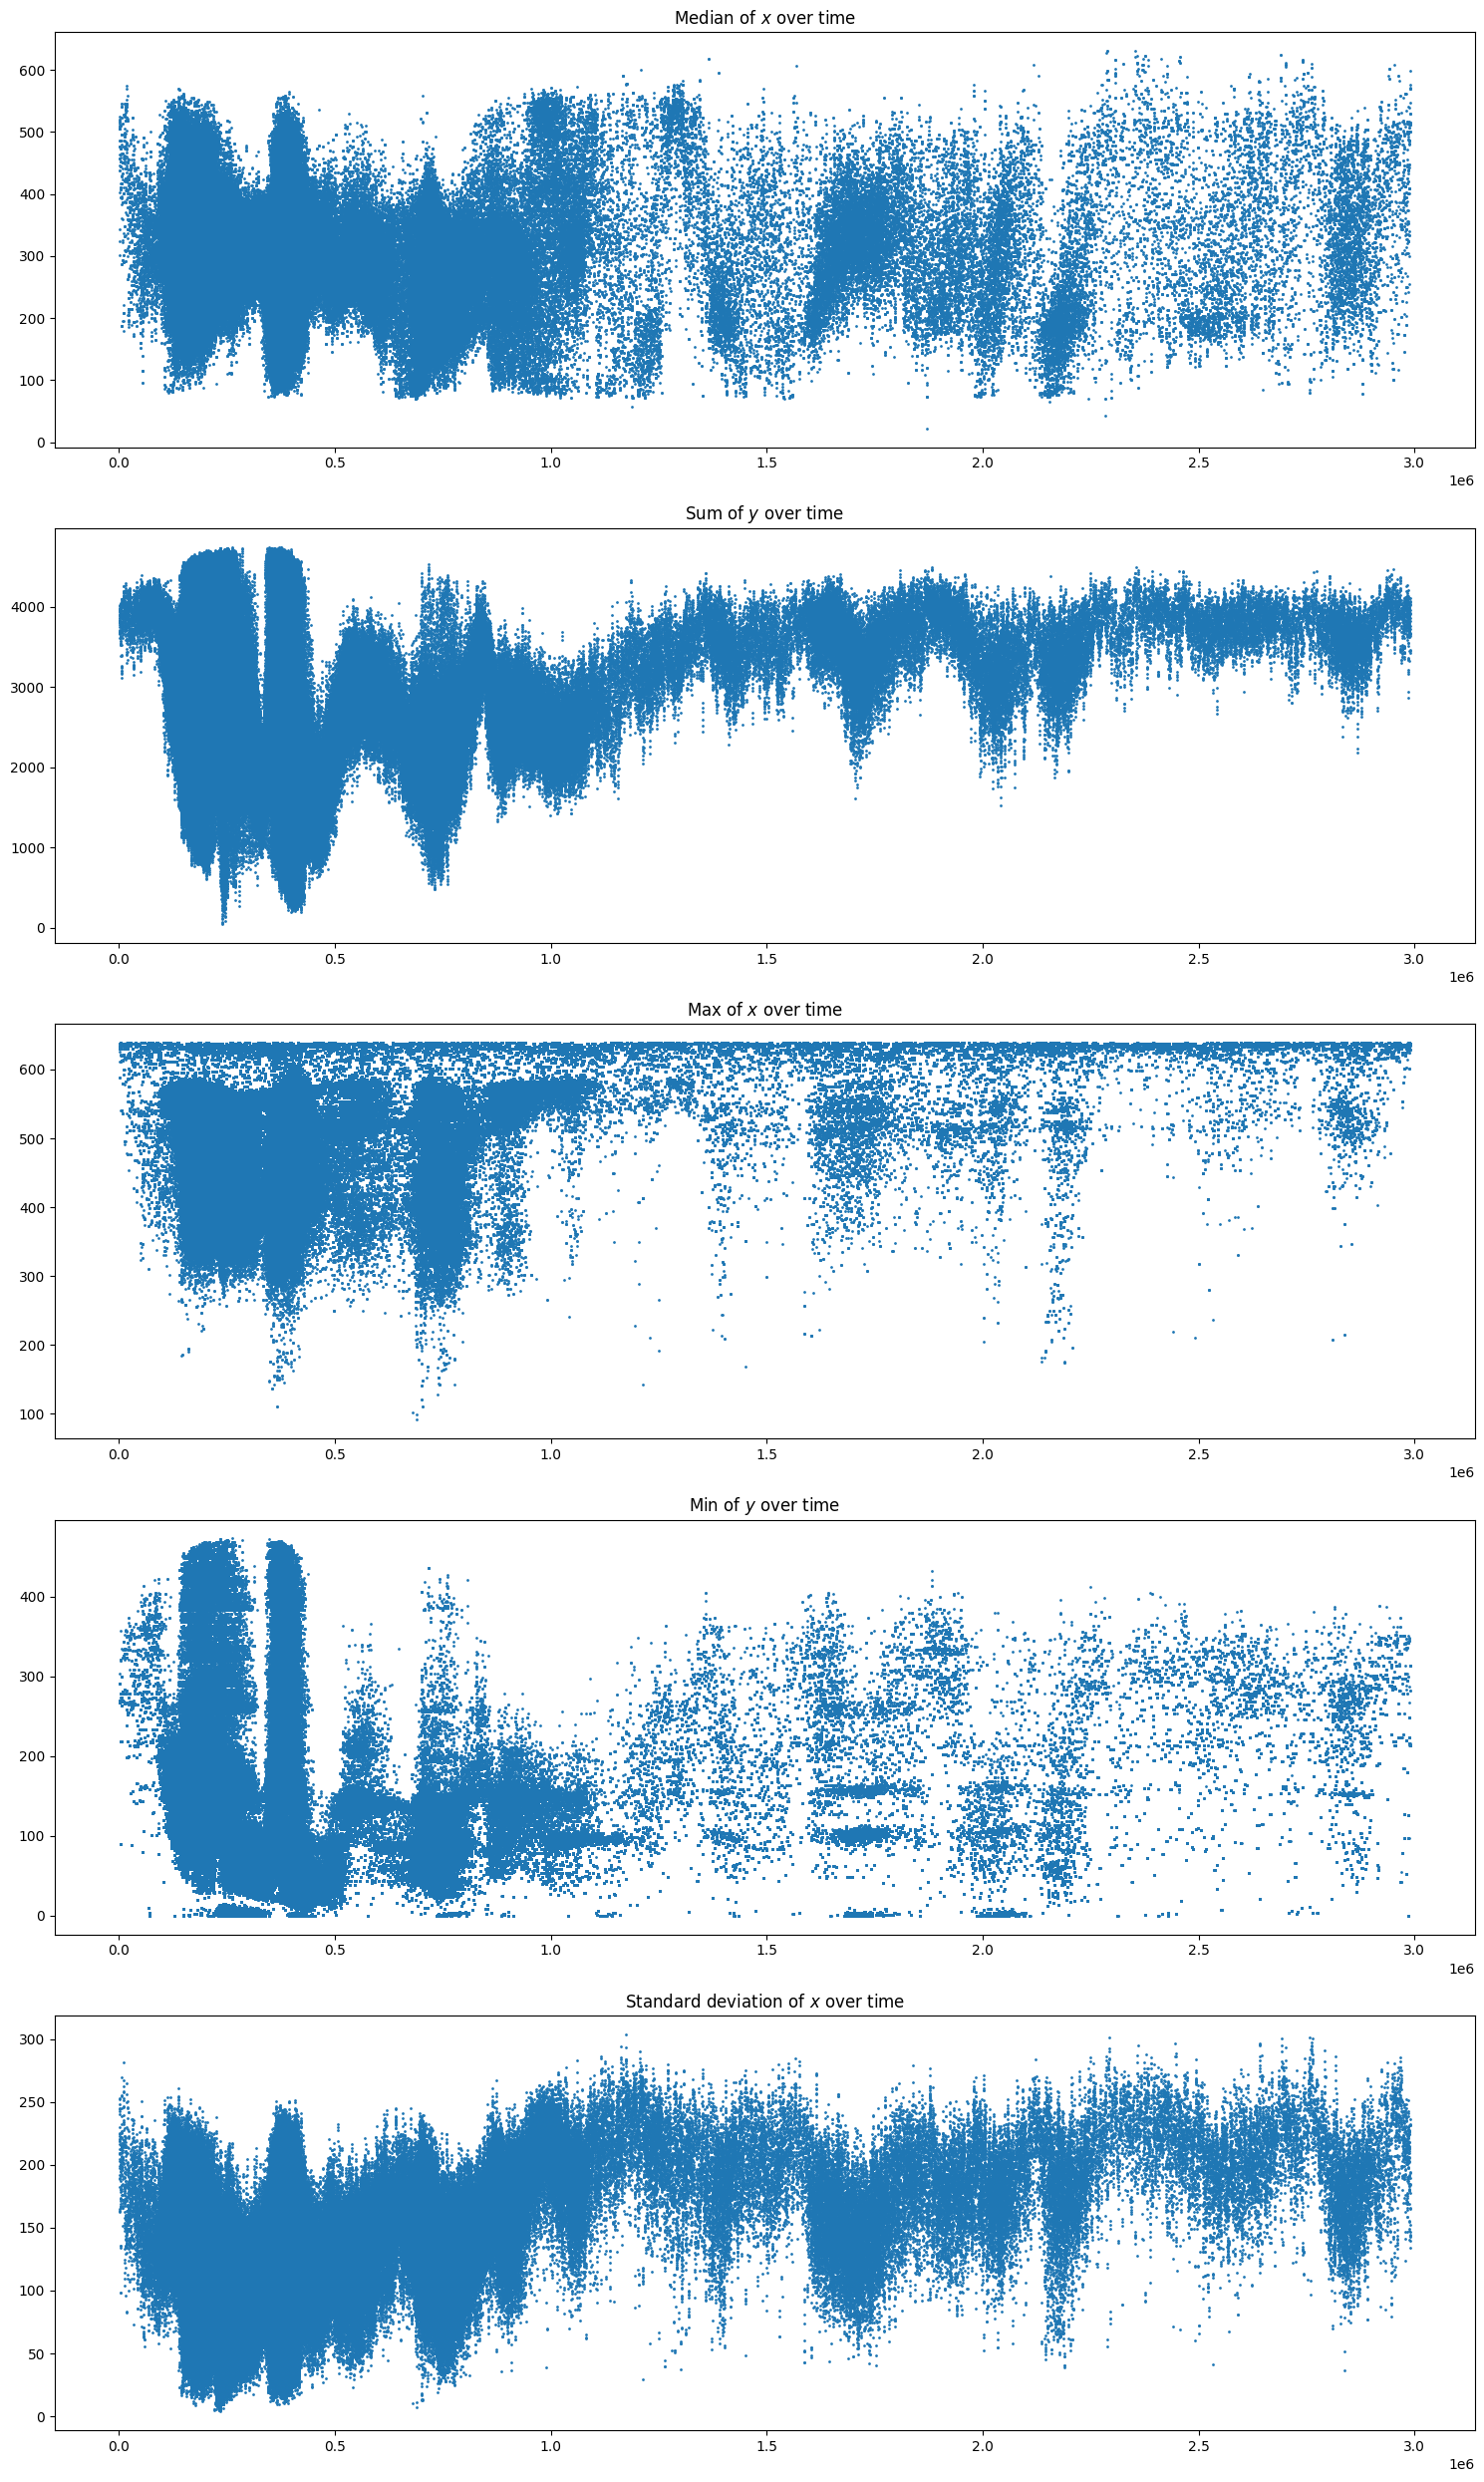

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

# Calculate aggregated features
window_size = 10  # adjust this to change the number of events to aggregate over
test_event_df['x_median'] = test_event_df['x'].rolling(window_size).median()
test_event_df['y_sum'] = test_event_df['y'].rolling(window_size).sum()
test_event_df['x_max'] = test_event_df['x'].rolling(window_size).max()
test_event_df['y_min'] = test_event_df['y'].rolling(window_size).min()
test_event_df['x_std'] = test_event_df['x'].rolling(window_size).std()

x_median = test_event_df['x_median']
y_sum = test_event_df['y_sum']
x_max = test_event_df['x_max']
y_min = test_event_df['y_min']
x_std = test_event_df['x_std']
t = test_event_df['t']

fig, axs = plt.subplots(5, 1, figsize=(15, 25))  # Create five subplots one below the other

# Scatter plot for x median over time
axs[0].scatter(t, x_median, s=1)
axs[0].set_title('Median of $x$ over time')

# Scatter plot for y sum over time
axs[1].scatter(t, y_sum, s=1)
axs[1].set_title('Sum of $y$ over time')

# Scatter plot for x max over time
axs[2].scatter(t, x_max, s=1)
axs[2].set_title('Max of $x$ over time')

# Scatter plot for y min over time
axs[3].scatter(t, y_min, s=1)
axs[3].set_title('Min of $y$ over time')

# Scatter plot for x standard deviation over time
axs[4].scatter(t, x_std, s=1)
axs[4].set_title('Standard deviation of $x$ over time')

plt.tight_layout()
plt.show()

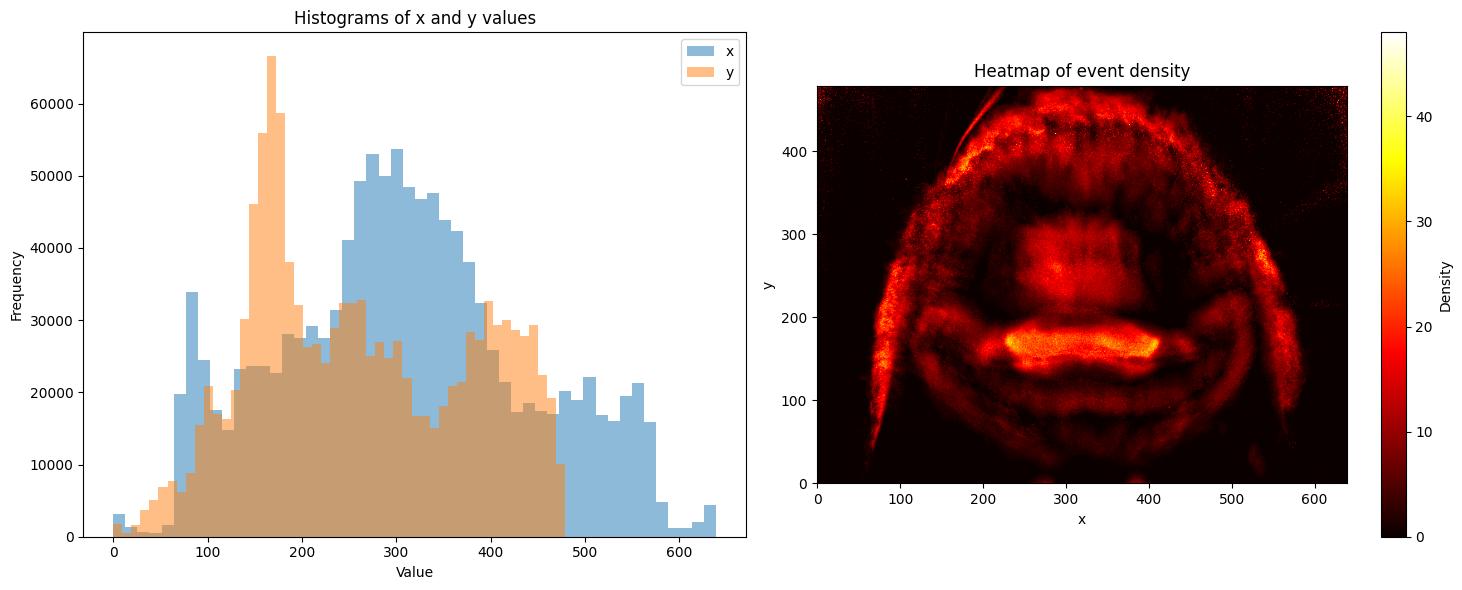

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Read the event data from a CSV file
column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

# Extract the x, y, and t values from the event data
x = test_event_df['x']
y = test_event_df['y']
t = test_event_df['t']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot histograms of x and y values on the first subplot
axs[0].hist(x, bins=50, alpha=0.5, label='x')
axs[0].hist(y, bins=50, alpha=0.5, label='y')
axs[0].set_title('Histograms of x and y values')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].legend(loc='upper right')

# Create a heatmap - contour plot - of event density on the second subplot
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[640, 480])
im = axs[1].imshow(heatmap.T, origin='lower', cmap='hot')  # Add a color map
axs[1].set_title('Heatmap of event density')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.colorbar(im, ax=axs[1], label='Density')  # Add a color bar with label

plt.tight_layout()
plt.show()

/var/folders/59/g78zms8d1qdfyxr2yzf9bzr40000gn/T/ipykernel_32727/485199113.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(t_sampled, x_sampled, y_sampled, s=1, cmap='viridis') # Add a color map


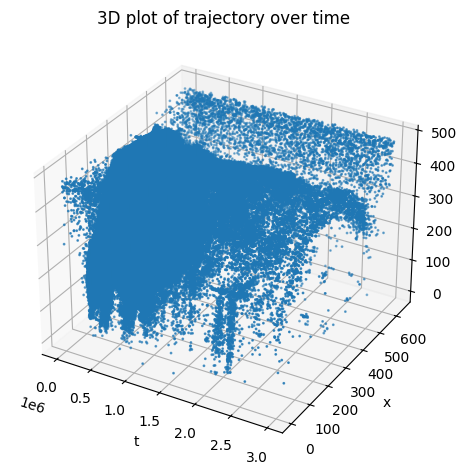

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select every 3rd element
x_sampled = x[::3]
y_sampled = y[::3]
t_sampled = t[::3]

# Create a 3D plot of the trajectory over time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(t_sampled, x_sampled, y_sampled, s=1, cmap='viridis') # Add a color map
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.title('3D plot of trajectory over time')

plt.tight_layout()
plt.show()

In [2]:
''' Line map of trajectory over time '''

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

column_names = ['x', 'y', 'p', 't']
test_event_df = pd.read_csv('train10/train10/Addition/0.csv', header=None, names=column_names)

plt.figure(figsize=(10, 6))

# Plot the trajectories
for i in tqdm(test_event_df.index):
   plt.plot(test_event_df.loc[i, 't'], test_event_df.loc[i, 'x'], label='x')
   plt.plot(test_event_df.loc[i, 't'], test_event_df.loc[i, 'y'], label='y')

plt.title('Trajectories over time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

plt.tight_layout()
plt.show()

100%|██████████| 1183203/1183203 [43:57<00:00, 448.65it/s] 
